### Target:
    
    - Add Dropout of 1%.

### Results:

    - Model has 7979 parameters.

    - Train Accuracy = 99.23

    - Test Accuracy = 99.26

### Analysis:

    - No longer overfitting. Infact it's the opposite.

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: cuda


In [ ]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [ ]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from model import Model5 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model5                                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 10, 28, 28]          --                             --
│    └─Conv2d: 2-1                       [32, 1, 28, 28]           [32, 9, 28, 28]           81                          1.02%
│    └─Dropout: 2-2                      [32, 9, 28, 28]           [32, 9, 28, 28]           --                             --
│    └─ReLU: 2-3                         [32, 9, 28, 28]           [32, 9, 28, 28]           --                             --
│    └─BatchNorm2d: 2-4                  [32, 9, 28, 28]           [32, 9, 28, 28]           18                          0.23%
│    └─Conv2d: 2-5                       [32, 9, 28, 28]           [32, 10, 28, 28]          810               

In [ ]:
from utils import train, test

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.1785 Batch_id=1874 Average Loss=0.1855 Accuracy=94.44: 100%|██████████| 1875/1875 [00:40<00:00, 46.56it/s]


Test set: Average loss: 0.0612, Accuracy: 9806/10000 (98.06%)

Epoch 2


Train: Batch Loss=0.0970 Batch_id=1874 Average Loss=0.0727 Accuracy=97.76: 100%|██████████| 1875/1875 [00:29<00:00, 62.96it/s]


Test set: Average loss: 0.0424, Accuracy: 9864/10000 (98.64%)

Epoch 3


Train: Batch Loss=0.0273 Batch_id=1874 Average Loss=0.0597 Accuracy=98.13: 100%|██████████| 1875/1875 [00:29<00:00, 63.43it/s]


Test set: Average loss: 0.0425, Accuracy: 9856/10000 (98.56%)

Epoch 4


Train: Batch Loss=0.0064 Batch_id=1874 Average Loss=0.0525 Accuracy=98.41: 100%|██████████| 1875/1875 [00:29<00:00, 62.81it/s]


Test set: Average loss: 0.0290, Accuracy: 9900/10000 (99.00%)

Epoch 5


Train: Batch Loss=0.0027 Batch_id=1874 Average Loss=0.0451 Accuracy=98.62: 100%|██████████| 1875/1875 [00:31<00:00, 60.38it/s]


Test set: Average loss: 0.0280, Accuracy: 9910/10000 (99.10%)

Epoch 6


Train: Batch Loss=0.0134 Batch_id=1874 Average Loss=0.0417 Accuracy=98.70: 100%|██████████| 1875/1875 [00:29<00:00, 62.56it/s]


Test set: Average loss: 0.0283, Accuracy: 9906/10000 (99.06%)

Epoch 7


Train: Batch Loss=0.0225 Batch_id=1874 Average Loss=0.0364 Accuracy=98.87: 100%|██████████| 1875/1875 [00:30<00:00, 61.52it/s]


Test set: Average loss: 0.0249, Accuracy: 9917/10000 (99.17%)

Epoch 8


Train: Batch Loss=0.0032 Batch_id=1874 Average Loss=0.0340 Accuracy=98.95: 100%|██████████| 1875/1875 [00:29<00:00, 62.72it/s]


Test set: Average loss: 0.0244, Accuracy: 9918/10000 (99.18%)

Epoch 9


Train: Batch Loss=0.0169 Batch_id=1874 Average Loss=0.0348 Accuracy=98.91: 100%|██████████| 1875/1875 [00:30<00:00, 61.92it/s]


Test set: Average loss: 0.0264, Accuracy: 9922/10000 (99.22%)

Epoch 10


Train: Batch Loss=0.0067 Batch_id=1874 Average Loss=0.0313 Accuracy=99.04: 100%|██████████| 1875/1875 [00:29<00:00, 63.53it/s]


Test set: Average loss: 0.0219, Accuracy: 9925/10000 (99.25%)

Epoch 11


Train: Batch Loss=0.0003 Batch_id=1874 Average Loss=0.0299 Accuracy=99.06: 100%|██████████| 1875/1875 [00:30<00:00, 61.64it/s]


Test set: Average loss: 0.0251, Accuracy: 9916/10000 (99.16%)

Epoch 12


Train: Batch Loss=0.0010 Batch_id=1874 Average Loss=0.0263 Accuracy=99.17: 100%|██████████| 1875/1875 [00:30<00:00, 60.79it/s]


Test set: Average loss: 0.0276, Accuracy: 9913/10000 (99.13%)

Epoch 13


Train: Batch Loss=0.0046 Batch_id=1874 Average Loss=0.0284 Accuracy=99.11: 100%|██████████| 1875/1875 [00:30<00:00, 61.05it/s]


Test set: Average loss: 0.0251, Accuracy: 9917/10000 (99.17%)

Epoch 14


Train: Batch Loss=0.0063 Batch_id=1874 Average Loss=0.0277 Accuracy=99.10: 100%|██████████| 1875/1875 [00:30<00:00, 62.24it/s]


Test set: Average loss: 0.0247, Accuracy: 9912/10000 (99.12%)

Epoch 15


Train: Batch Loss=0.0587 Batch_id=1874 Average Loss=0.0243 Accuracy=99.23: 100%|██████████| 1875/1875 [00:30<00:00, 61.97it/s]


Test set: Average loss: 0.0216, Accuracy: 9926/10000 (99.26%)



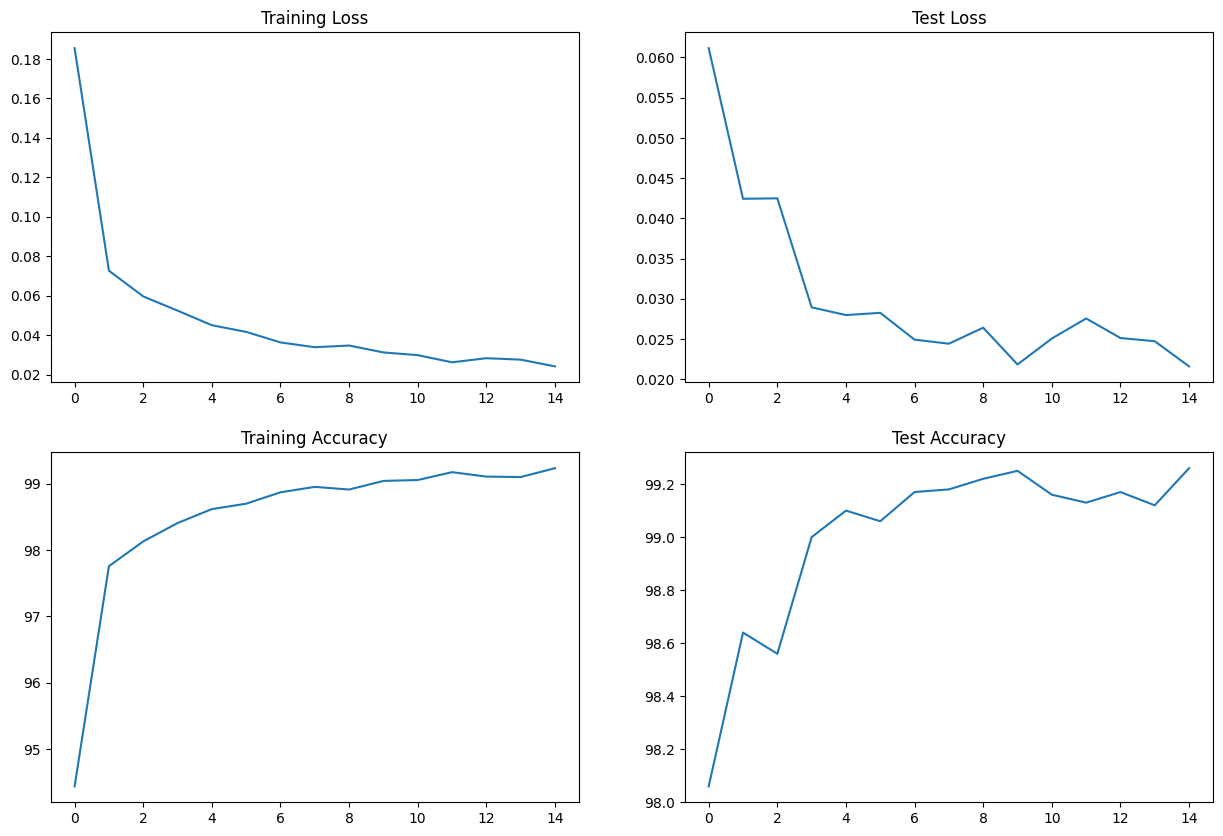

In [ ]:
from utils import plot_stats
plot_stats()

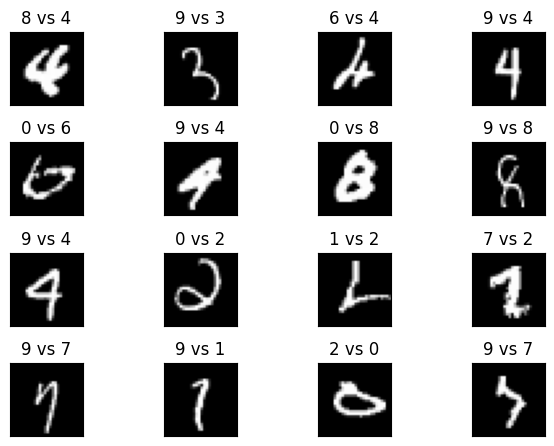

In [ ]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual